# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

--2025-11-16 13:42:58--  https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58374 (57K) [text/plain]
Saving to: ‘car_data.csv’

car_data.csv        100%[===================>]  57.01K  --.-KB/s    in 0.001s  

2025-11-16 13:42:58 (43.0 MB/s) - ‘car_data.csv’ saved [58374/58374]



In [2]:
!pip install scikit-plot

import pandas as pd
import numpy as np
import scipy
scipy.interp = np.interp # добавил, тк. иначе была проблема с совместимостью

In [3]:

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report
import scikitplot as skplt
import matplotlib.pyplot as plt


dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [4]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,235,90,48,78,134,56,11,160,43,20,167,169,366,185,76,1,14,182,192
1,811,83,39,69,127,54,5,135,49,18,131,155,274,162,69,16,6,187,190
2,185,100,41,75,205,71,5,176,36,21,138,204,479,151,72,7,19,197,197
3,16,89,36,51,109,52,6,118,57,17,129,137,206,125,80,2,14,181,185
4,546,92,40,66,111,48,7,139,50,19,140,159,277,148,85,12,19,182,183
5,527,109,49,103,186,57,11,206,32,23,156,212,630,186,65,12,21,192,201
6,597,88,42,66,133,57,6,123,54,17,144,147,227,160,66,8,4,193,198
7,59,85,39,68,119,52,5,128,53,18,135,148,241,142,75,8,8,182,187
8,589,104,55,105,223,70,10,223,30,25,177,237,737,218,75,14,11,188,196
9,76,91,39,83,170,60,8,172,38,21,134,197,445,152,72,0,10,188,194


Methods `describe` and `info` deliver some useful information.

In [5]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,407.448087,93.504554,44.908925,81.921676,169.165756,61.950820,8.633880,168.852459,40.950820,20.571949,148.158470,188.983607,440.060109,175.107468,72.845173,6.393443,12.737705,188.755920,195.397086
std,238.773844,8.202861,6.106334,15.815752,34.430346,8.674536,5.141326,33.289568,7.840992,2.592243,14.302596,31.889890,176.963938,32.407326,7.973249,4.896188,8.822275,6.189126,7.542753
min,0.000000,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,112.000000,60.000000,0.000000,0.000000,176.000000,181.000000
25%,203.000000,87.000000,40.000000,70.000000,140.000000,57.000000,6.000000,147.000000,33.000000,19.000000,138.000000,167.000000,318.000000,150.000000,67.000000,2.000000,6.000000,184.000000,190.000000
50%,406.000000,92.000000,44.000000,79.000000,168.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,178.000000,363.000000,174.000000,72.000000,6.000000,11.000000,188.000000,196.000000
75%,609.000000,99.000000,49.000000,98.000000,195.000000,65.000000,10.000000,199.000000,46.000000,23.000000,159.000000,217.000000,596.000000,198.000000,76.000000,9.000000,19.000000,193.000000,201.000000
max,843.000000,117.000000,59.000000,112.000000,333.000000,138.000000,52.000000,262.000000,61.000000,28.000000,188.000000,320.000000,998.000000,268.000000,135.000000,22.000000,38.000000,206.000000,211.000000


In [6]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [7]:
# YOUR CODE HERE

# Масштабируем числовые признаки: важно для PCA и лог.регрессии, чтобы избежать искажений, вызванных разным масштабом
# Scaler обучается только на обучающих данных, чтобы избежать утечки.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Кодируем целевую переменную
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

print("Данные отмасштабированы, целевая переменная закодирована.")
print("Пример закодированных меток:", y_train_encoded[:5])
print("Классы:", le.classes_)

Данные отмасштабированы, целевая переменная закодирована.
Пример закодированных меток: [3 1 0 3 3]
Классы: ['bus' 'opel' 'saab' 'van']


#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

Лучший параметр C: 10.0
Accuracy (LogReg): 0.8148
F1-score (LogReg): 0.8155


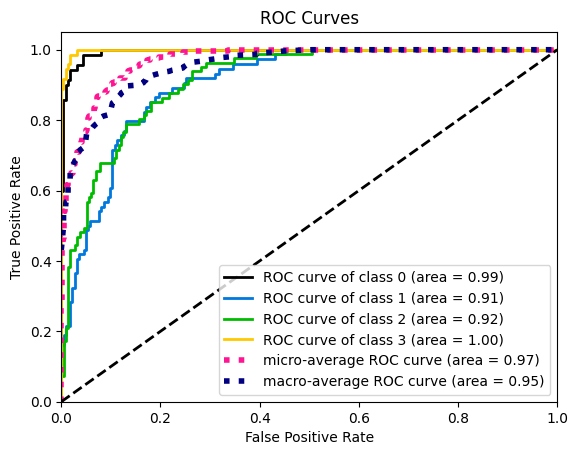

In [8]:
# YOUR CODE HERE

# Задаем сетку гиперпараметров
param_grid = {'C': np.logspace(-3, 3, 7)}

# Создаем модель
log_reg = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500, random_state=42)

# GridSearchCV для поиска лучшего C с кросс-валидацией
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='f1_weighted')
grid_search.fit(X_train_scaled, y_train_encoded)

best_log_reg = grid_search.best_estimator_
print(f"Лучший параметр C: {grid_search.best_params_['C']}")

# Делаем предсказания
y_pred_log_reg = best_log_reg.predict(X_test_scaled)
y_proba_log_reg = best_log_reg.predict_proba(X_test_scaled)

# Оцениваем качество
accuracy_lr = accuracy_score(y_test_encoded, y_pred_log_reg)
f1_lr = f1_score(y_test_encoded, y_pred_log_reg, average='weighted')
print(f"Accuracy (LogReg): {accuracy_lr:.4f}")
print(f"F1-score (LogReg): {f1_lr:.4f}")

#  ROC-кривая
skplt.metrics.plot_roc(y_test_encoded, y_proba_log_reg)
plt.show()

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot.

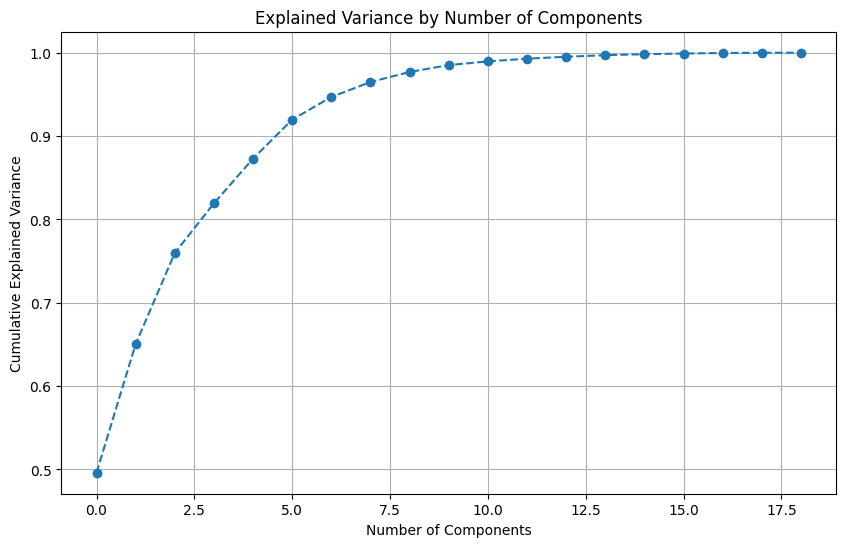

In [9]:
# YOUR CODE HERE

pca = PCA()
pca.fit(X_train_scaled)

# Строим график
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.title('Explained Variance by Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [10]:
# YOUR CODE HERE

n_components_95 = np.where(np.cumsum(pca.explained_variance_ratio_) >= 0.95)[0][0] + 1
print(f"Количество компонент для 95% дисперсии: {n_components_95}")

# Создаем PCA с выбранным числом компонент
pca_final = PCA(n_components=n_components_95)

# Преобразуем обучающую и тестовую выборки
X_train_pca = pca_final.fit_transform(X_train_scaled)
X_test_pca = pca_final.transform(X_test_scaled)

print("Форма данных после PCA:", X_train_pca.shape)

Количество компонент для 95% дисперсии: 8
Форма данных после PCA: (549, 8)


**Should you normalize the data?**

Да, нормализовали с помощью StandardScaler  в пункте 2.0

**Select the appropriate number of components. Briefly explain your choice.**

Выбираем количество компонент, объясняющих 95% дисперсии.
это общепринятая эвристика, в приниципе, мы почти "ничего не теряем" важного с т.з. информации, но заметно сокращаем кол-во компонент

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

Лучший параметр C после PCA: 100.0
Accuracy (LogReg on PCA): 0.6734
F1-score (LogReg on PCA): 0.6617


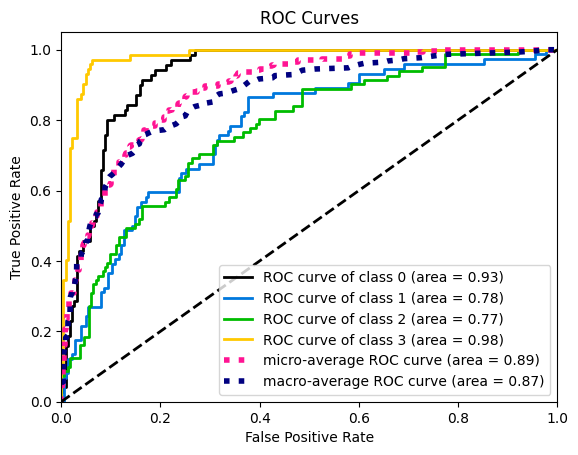

In [11]:
# YOUR CODE HERE

# Поиск по сетке для данных после PCA
grid_search_pca = GridSearchCV(log_reg, param_grid, cv=5, scoring='f1_weighted')
grid_search_pca.fit(X_train_pca, y_train_encoded)

best_log_reg_pca = grid_search_pca.best_estimator_
print(f"Лучший параметр C после PCA: {grid_search_pca.best_params_['C']}")

# Предсказания и оценка
y_pred_log_reg_pca = best_log_reg_pca.predict(X_test_pca)
y_proba_log_reg_pca = best_log_reg_pca.predict_proba(X_test_pca)

accuracy_lr_pca = accuracy_score(y_test_encoded, y_pred_log_reg_pca)
f1_lr_pca = f1_score(y_test_encoded, y_pred_log_reg_pca, average='weighted')
print(f"Accuracy (LogReg on PCA): {accuracy_lr_pca:.4f}")
print(f"F1-score (LogReg on PCA): {f1_lr_pca:.4f}")

# ROC-кривая
skplt.metrics.plot_roc(y_test_encoded, y_proba_log_reg_pca)
plt.show()

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [12]:
# YOUR CODE HERE

# Сетка для поиска глубины дерева
tree_param_grid = {'max_depth': np.arange(2, 20)}

# Используем исходные масштабированные данные
dt = DecisionTreeClassifier(random_state=42)
grid_search_dt = GridSearchCV(dt, tree_param_grid, cv=5, scoring='f1_weighted')
grid_search_dt.fit(X_train_scaled, y_train_encoded)

best_dt = grid_search_dt.best_estimator_
print(f"Лучшая глубина дерева: {grid_search_dt.best_params_['max_depth']}")

# Предсказания и оценка
y_pred_dt = best_dt.predict(X_test_scaled)
accuracy_dt = accuracy_score(y_test_encoded, y_pred_dt)
f1_dt = f1_score(y_test_encoded, y_pred_dt, average='weighted')
print(f"Accuracy (Decision Tree): {accuracy_dt:.4f}")
print(f"F1-score (Decision Tree): {f1_dt:.4f}")

Лучшая глубина дерева: 7
Accuracy (Decision Tree): 0.6599
F1-score (Decision Tree): 0.6500


#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble?

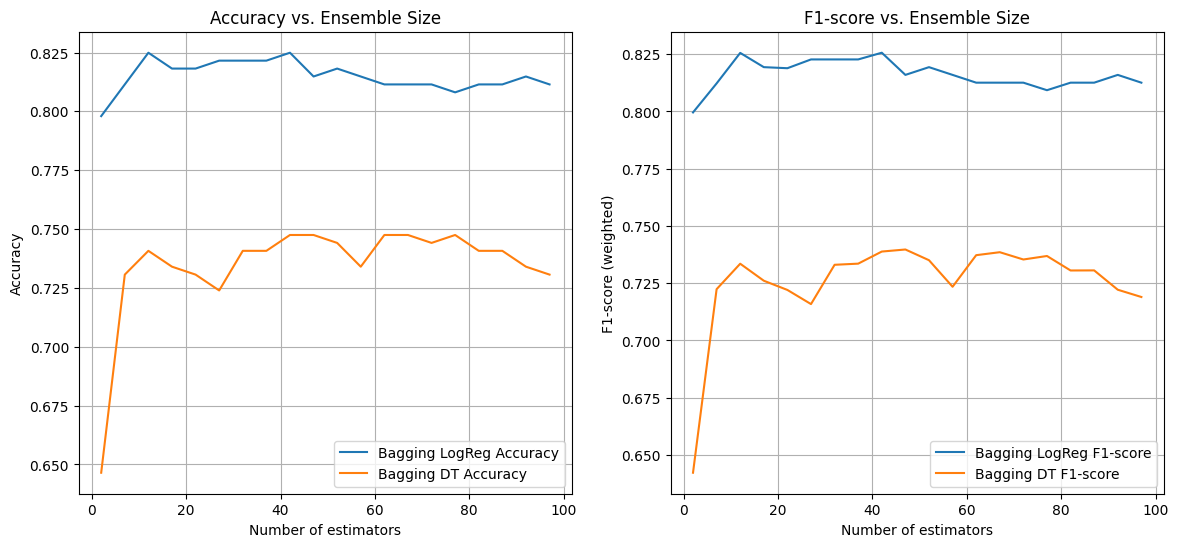

In [13]:
# YOUR CODE HERE

from sklearn.ensemble import BaggingClassifier

# Диапазон размеров ансамбля
n_estimators_range = np.arange(2, 101, 5)

#  Бэггинг для Лог.регрессии
bagging_lr_acc, bagging_lr_f1 = [], []
for n in n_estimators_range:
    bagging_lr = BaggingClassifier(estimator=best_log_reg, n_estimators=n, random_state=42, n_jobs=-1)
    bagging_lr.fit(X_train_scaled, y_train_encoded)
    y_pred = bagging_lr.predict(X_test_scaled)
    bagging_lr_acc.append(accuracy_score(y_test_encoded, y_pred))
    bagging_lr_f1.append(f1_score(y_test_encoded, y_pred, average='weighted'))

#  Бэггинг для Решающего дерева
bagging_dt_acc, bagging_dt_f1 = [], []
for n in n_estimators_range:
    bagging_dt = BaggingClassifier(estimator=best_dt, n_estimators=n, random_state=42, n_jobs=-1)
    bagging_dt.fit(X_train_scaled, y_train_encoded)
    y_pred = bagging_dt.predict(X_test_scaled)
    bagging_dt_acc.append(accuracy_score(y_test_encoded, y_pred))
    bagging_dt_f1.append(f1_score(y_test_encoded, y_pred, average='weighted'))

# Графики
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(n_estimators_range, bagging_lr_acc, label='Bagging LogReg Accuracy')
plt.plot(n_estimators_range, bagging_dt_acc, label='Bagging DT Accuracy')
plt.title('Accuracy vs. Ensemble Size')
plt.xlabel('Number of estimators')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(n_estimators_range, bagging_lr_f1, label='Bagging LogReg F1-score')
plt.plot(n_estimators_range, bagging_dt_f1, label='Bagging DT F1-score')
plt.title('F1-score vs. Ensemble Size')
plt.xlabel('Number of estimators')
plt.ylabel('F1-score (weighted)')
plt.legend()
plt.grid(True)

plt.show()

*    Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.
**Для ансамбля регрессий метрики качества не растут, так как бэггинг не снижает bias, а varience у регрессий (это ведь линейные модели) и так низкий.
Для ансамбля деревьев бэггинг значительно увеличивает точность модели, до 18ти непрерывно растётб дальше колеблется вокруг**.


*    How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble?
**Нет, не оптимальны. Гиперпараметры, подобранные для единичного дерева, скорее всего, не будут лучшим выбором для деревьев в ансамбе. Так как для одного лерева мы ищем такие гиперпараметры, чтобы не переобучиться и не получить высокий varience. А бэггинг как раз и призван снизить varience, так что параметры могут отличаться.**

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

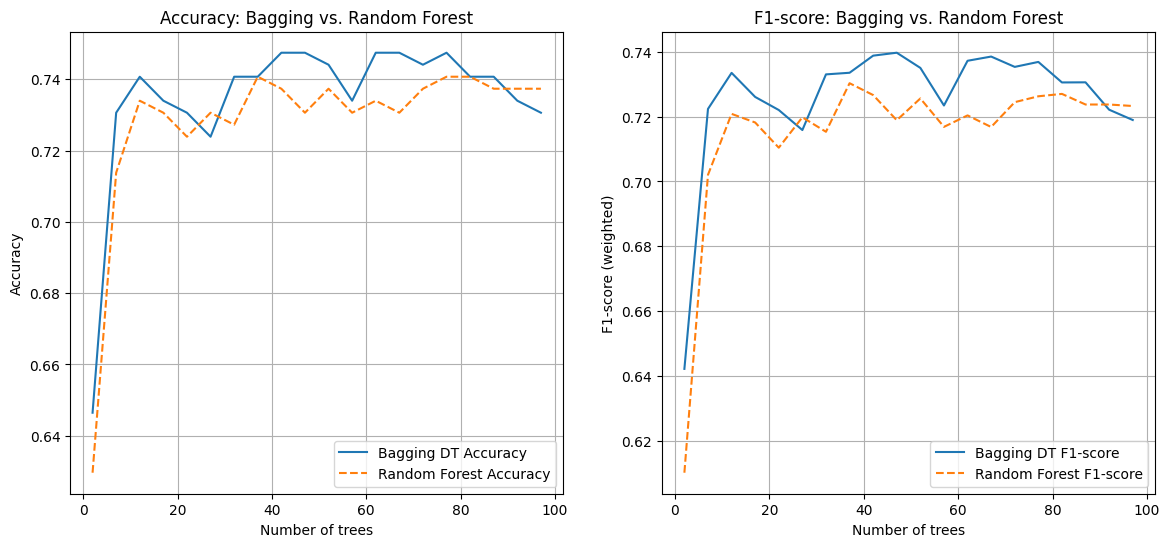

In [14]:
# YOUR CODE HERE

rf_acc, rf_f1 = [], []
for n in n_estimators_range:
    rf = RandomForestClassifier(n_estimators=n, max_depth=best_dt.max_depth, random_state=42, n_jobs=-1)
    rf.fit(X_train_scaled, y_train_encoded)
    y_pred = rf.predict(X_test_scaled)
    rf_acc.append(accuracy_score(y_test_encoded, y_pred))
    rf_f1.append(f1_score(y_test_encoded, y_pred, average='weighted'))

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(n_estimators_range, bagging_dt_acc, label='Bagging DT Accuracy')
plt.plot(n_estimators_range, rf_acc, label='Random Forest Accuracy', linestyle='--')
plt.title('Accuracy: Bagging vs. Random Forest')
plt.xlabel('Number of trees')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(n_estimators_range, bagging_dt_f1, label='Bagging DT F1-score')
plt.plot(n_estimators_range, rf_f1, label='Random Forest F1-score', linestyle='--')
plt.title('F1-score: Bagging vs. Random Forest')
plt.xlabel('Number of trees')
plt.ylabel('F1-score (weighted)')
plt.legend()
plt.grid(True)

plt.show()

* What is the optimal number of trees you've got?

**Примерно 40 деревьев где-то. В этой зоне Accuracy достигает своего пика (~0.76), а F1-score также показывает одни из лучших значений**
*   Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

**Accuracy на пике повыше у RT, но он в целом менее стабилен. Это может быть вызвано методом случайных подпространств, который используется в слуяайном лесе.**

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it?

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

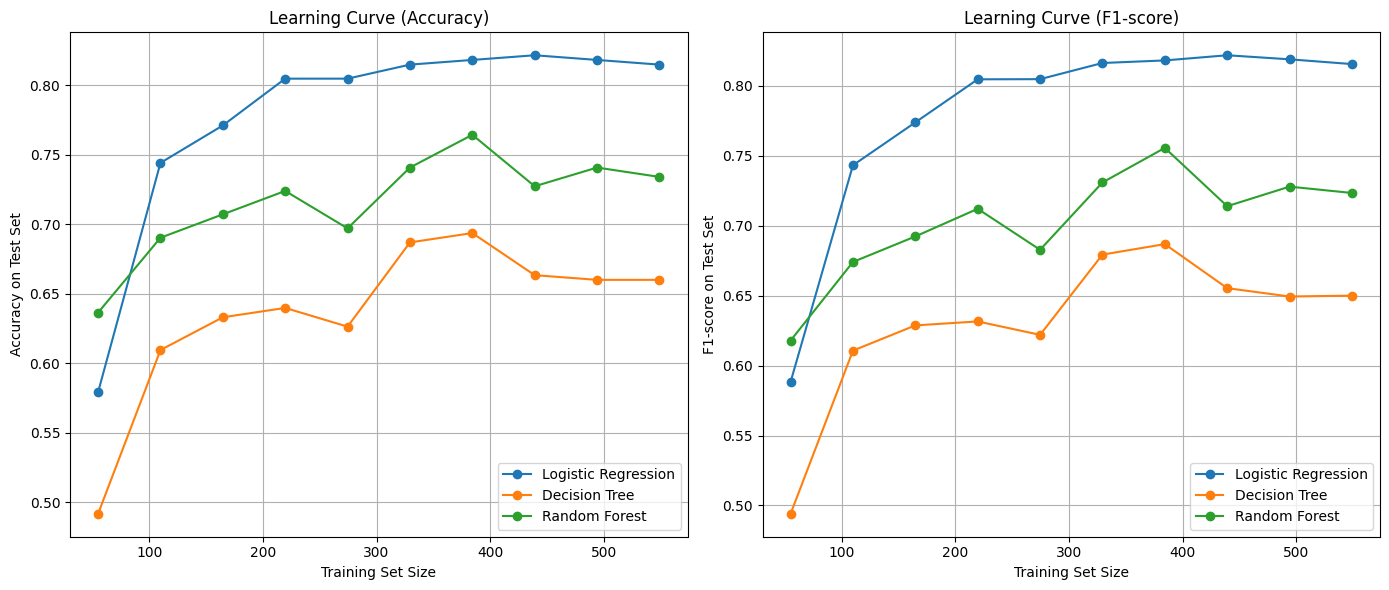

In [15]:
# YOUR CODE HERE

# Определяем модели с лучшими гиперпараметрами
best_lr_final = best_log_reg
best_dt_final = best_dt


best_rf_final = RandomForestClassifier(n_estimators=40, max_depth=best_dt.max_depth, random_state=42, n_jobs=-1)

models = {
    "Logistic Regression": best_lr_final,
    "Decision Tree": best_dt_final,
    "Random Forest": best_rf_final
}

# Размеры обучающей выборки
train_sizes = np.linspace(0.1, 1.0, 10)

plt.figure(figsize=(14, 6))

for name, model in models.items():
    acc_scores = []
    f1_scores = []
    for size in train_sizes:
        n_samples = int(size * X_train_scaled.shape[0])

        model.fit(X_train_scaled[:n_samples], y_train_encoded[:n_samples])

        # Тестируем
        y_pred = model.predict(X_test_scaled)
        acc_scores.append(accuracy_score(y_test_encoded, y_pred))
        f1_scores.append(f1_score(y_test_encoded, y_pred, average='weighted'))

    # графики
    plt.subplot(1, 2, 1)
    plt.plot(train_sizes * X_train_scaled.shape[0], acc_scores, label=name, marker='o')

    plt.subplot(1, 2, 2)
    plt.plot(train_sizes * X_train_scaled.shape[0], f1_scores, label=name, marker='o')

plt.subplot(1, 2, 1)
plt.title('Learning Curve (Accuracy)')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy on Test Set')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.title('Learning Curve (F1-score)')
plt.xlabel('Training Set Size')
plt.ylabel('F1-score on Test Set')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

**Analyse the final plot. Can you make any conlusions using it?**
Выводы:
* **Сравнение моделей**: Для данного набора данных и выбранных гиперпараметров Лог.регрессия оказалась наиболее эффективной моделью, особенно на небольших и средних объёмах данных. Случайный лес показывает значительное улучшение по сравнению с одиночным деревом, как раз за счёт ансамблирования. Решающее дерево -- ожидаемый аутсайдер.
* **Эффект размера выборки**: Графики показывают, что для всех моделей увеличение объёма обучающих данных приводит к улучшению качества (до определённого момента).
* При этом важно отметить, что рост случайного леса (в отличии от лог.регрессии) не остановился и в конце он показывает восходящий тренд (особенно на графике F1-score). Это значит, что добавление  обучающих данных, скорее всего, позволит случайному лесу превзойти по качеству лог.регрессию и стать лучшей моделью для этой задачи. А лог.регрессия уже почти на плато и данные вряд ли улучшат качество модели.